## Stock Market Prediction using Numerical and Textual Analysis

# Tasks
### To create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices and sentimental analysis of new headlines 

In [1]:
import pandas as pd
from datetime import datetime
columns=['Date','Category','News']
ndf = pd.read_csv('india-news-headlines.csv',names=columns)
ndf.head()

C:\Users\Dell\anaconda3\envs\GRIP- The Sparks Foundation\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [2]:
ndf.drop(0 ,inplace=True)
ndf.drop('Category',axis =1,inplace = True)
ndf.head()

,Date,News
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa
5,20010102,Extra buses to clear tourist traffic


In [3]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424067 entries, 1 to 3424067
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 78.4+ MB


In [4]:
# changing date time type 
ndf['Date']=pd.to_datetime(ndf['Date'],format ='%Y%m%d')
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424067 entries, 1 to 3424067
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   News    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 78.4+ MB


In [5]:
ndf

,Date,News
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa
5,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3424063,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,2020-12-31,Govt extends deadline for use of FASTag till F...


In [6]:
# Group the headlines for each day
ndf['News']=ndf.groupby(['Date']).transform(lambda x :' '.join(x))
ndf = ndf.drop_duplicates()
ndf.reset_index(inplace=True,drop=True)

In [7]:
ndf

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...


In [8]:
ndf.shape

(7262, 2)

In [9]:
hisdf = pd.read_csv('BSESN.csv')
hisdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0


In [10]:
hisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [11]:
hisdf['Date']=pd.to_datetime(hisdf['Date'])
hisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB


In [12]:
hisdf.drop('Adj Close',axis = 1,inplace=True)

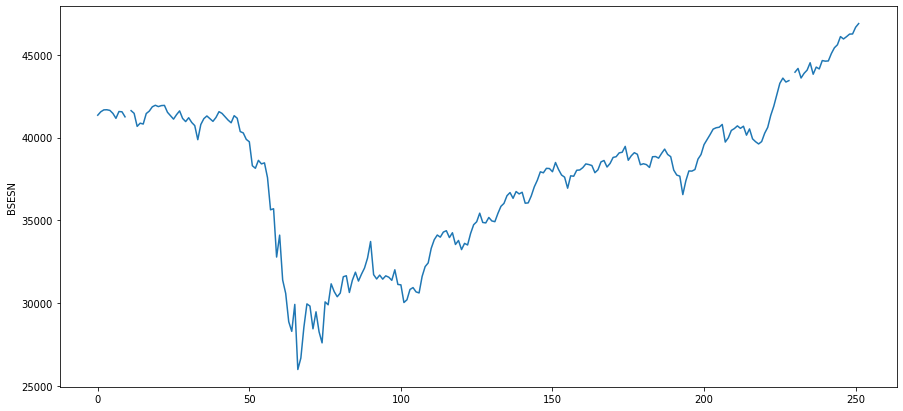

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.plot(hisdf['Close'])
plt.ylabel('BSESN')
plt.show()

In [14]:
# Data cleaning from ndf
# Removing unwanted characters 
ndf.replace("[^a -zA-Z']"," ",regex=True,inplace=True)
ndf["News"].head(5)

C:\Users\Dell\anaconda3\envs\GRIP- The Sparks Foundation\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


0    Status quo will not be disturbed at Ayodhya; s...
1    Powerless north India gropes in the dark Think...
2    The string that pulled Stephen Hawking to Indi...
3    Light combat craft takes India into club class...
4    Light combat craft takes India into club class...
Name: News, dtype: object

### Plotting Moving Average

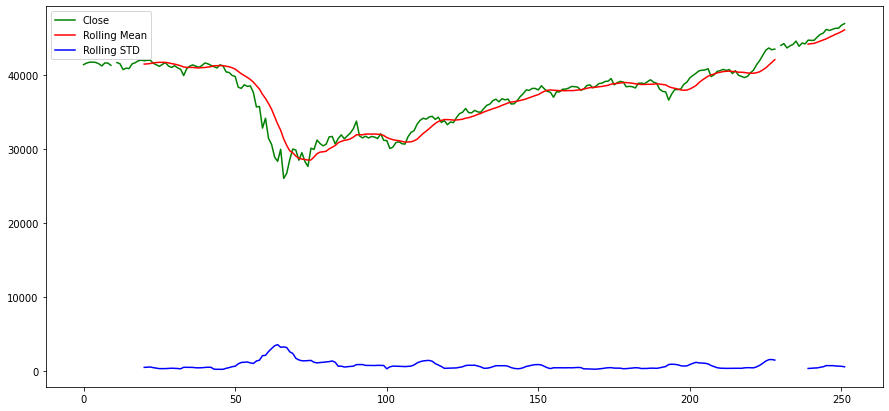

In [15]:
close =hisdf['Close']
mean = close.rolling(window=10).mean()
std = close.rolling(window=10).std()
plt.figure(figsize=(15,7))
hisdf['Close'].plot(color='g',label='Close')
mean.plot(color='r',label='Rolling Mean')
std.plot(color='b',label='Rolling STD')
plt.legend()


## Textual Analysis

In [16]:
from textblob import TextBlob

In [19]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [20]:
ndf['Subjectivity']=ndf['News'].apply(getSubjectivity)
ndf['Polarity']=ndf['News'].apply(getPolarity)
ndf

C:\Users\Dell\AppData\Local\Temp/ipykernel_6944/3971588201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Subjectivity']=ndf['News'].apply(getSubjectivity)
C:\Users\Dell\AppData\Local\Temp/ipykernel_6944/3971588201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Polarity']=ndf['News'].apply(getPolarity)


,Date,News,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517
7259,2020-12-29,Man recovers charred remains of 'thief' from h...,0.424021,0.061210
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496


In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

In [22]:
ndf['Compound']=[SIA.polarity_scores(v)['compound'] for v in ndf['News']]
ndf['Negative']=[SIA.polarity_scores(v)['neg'] for v in ndf['News']]
ndf['Neutral']=[SIA.polarity_scores(v)['neu'] for v in ndf['News']]
ndf['Positive']=[SIA.polarity_scores(v)['pos'] for v in ndf['News']]
ndf

C:\Users\Dell\AppData\Local\Temp/ipykernel_6944/1936893380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Compound']=[SIA.polarity_scores(v)['compound'] for v in ndf['News']]
C:\Users\Dell\AppData\Local\Temp/ipykernel_6944/1936893380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Negative']=[SIA.polarity_scores(v)['neg'] for v in ndf['News']]
C:\Users\Dell\AppData\Local\Temp/ipykernel_6944/1936893380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886,-0.9997,0.129,0.793,0.078
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517,-0.9998,0.138,0.768,0.093
7259,2020-12-29,Man recovers charred remains of 'thief' from h...,0.424021,0.061210,-0.9999,0.150,0.754,0.096
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496,-0.9999,0.144,0.775,0.081


# Merge Historical and Textual Data in one

In [23]:
df_merge = pd.merge(hisdf,ndf,how='inner',on='Date')
df_merge

,Date,Open,High,Low,Close,Volume,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,19000.0,After Jagannath Temple; Puri beach devpt plan ...,0.361641,0.035806,-1.0000,0.195,0.728,0.076
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,24300.0,What is Citizenship (Amendment) Bill 2019: All...,0.399387,0.037550,-0.9999,0.159,0.761,0.080
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,33300.0,Only 61% of CCA covered after revamp of canals...,0.375940,0.028690,-0.9998,0.129,0.804,0.067
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,33600.0,I'm done playing the good girl; I want to be a...,0.374114,0.041297,-0.9999,0.168,0.746,0.086
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,6200.0,Weekly Horoscope; December 22-28: Check predic...,0.404214,0.032329,-0.9999,0.153,0.760,0.088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020-12-11,46060.320313,46309.628906,45706.218750,46099.011719,26300.0,Ways to get you in the mood for sex when you'r...,0.383091,0.054693,-0.9999,0.162,0.751,0.088
248,2020-12-14,46284.699219,46373.339844,45951.531250,46253.460938,18400.0,No threat from Covid claims to balance sheets ...,0.386875,0.072025,-0.9996,0.125,0.783,0.092
249,2020-12-15,46287.390625,46350.300781,45841.671875,46263.171875,16400.0,1;147 RT-PCR tests in a day; only 3 found +ve ...,0.376347,0.041861,-0.9999,0.141,0.775,0.083
250,2020-12-16,46573.308594,46704.968750,46402.199219,46666.460938,13100.0,Asmita Sood's favourite holiday destinations a...,0.429164,0.066554,-0.9997,0.120,0.800,0.081


In [25]:
## selecting features for model training
df_merge1 = df_merge[['Close','Subjectivity','Polarity','Compound','Negative','Neutral','Positive']]
df_merge1

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,41352.171875,0.361641,0.035806,-1.0000,0.195,0.728,0.076
1,41558.570313,0.399387,0.037550,-0.9999,0.159,0.761,0.080
2,41673.921875,0.375940,0.028690,-0.9998,0.129,0.804,0.067
3,41681.539063,0.374114,0.041297,-0.9999,0.168,0.746,0.086
4,41642.660156,0.404214,0.032329,-0.9999,0.153,0.760,0.088
...,...,...,...,...,...,...,...
247,46099.011719,0.383091,0.054693,-0.9999,0.162,0.751,0.088
248,46253.460938,0.386875,0.072025,-0.9996,0.125,0.783,0.092
249,46263.171875,0.376347,0.041861,-0.9999,0.141,0.775,0.083
250,46666.460938,0.429164,0.066554,-0.9997,0.120,0.800,0.081


### Normalize data

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [31]:
scaler = MinMaxScaler()
df=scaler.fit_transform(df_merge1)
df_scaled=pd.DataFrame(df,columns=df_merge1.columns)
df_scaled.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.735131,0.179412,0.282922,0.00000,0.857143,0.088889,0.2875
1,0.745002,0.486673,0.298534,0.00005,0.571429,0.333333,0.3375
2,0.750519,0.295814,0.219221,0.00010,0.333333,0.651852,0.1750
3,0.750884,0.280945,0.332077,0.00005,0.642857,0.222222,0.4125
4,0.749024,0.525962,0.251798,0.00005,0.523810,0.325926,0.4375


In [57]:
md=df_scaled['Close'].median()
df_scaled['Close'].fillna(value=md,inplace=True)

In [59]:
df_scaled['Close'].isnull().sum()

0

In [60]:
X=df_scaled.drop('Close',axis=1)
y=df_scaled['Close']

In [61]:
print(X.shape,y.shape)

(252, 6) (252,)


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)
X_train.shape

(201, 6)

In [64]:
y_train.isnull().sum()

0

In [65]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)

In [70]:
print('Mean Squared Error',mean_squared_error(y_test,pred))

Mean Squared Error 0.05201247006059317


In [72]:
!pip install xgboost

  Using cached xgboost-1.4.2-py3-none-win_amd64.whl (97.8 MB)


In [73]:
import xgboost

In [74]:
xgb = xgboost.XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
pred2=xgb.predict(X_test)
print('Mean Squared Error',mean_squared_error(y_test,pred2))

Mean Squared Error 0.05869666145298414


In [76]:
from sklearn.ensemble import AdaBoostRegressor

In [77]:
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)
pred3 = ada.predict(X_test)
print('Mean Squared Error',mean_squared_error(y_test,pred3))

Mean Squared Error 0.05140675587506454


## Conclusion 
### Among above three algorithm AdaBoostRegressor gives least error

## Mean Squared Error
### RandomForest = 0.0520
### XGBoost = 0.058
### AdaBoost = 0.0514